In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numba import jit

In [2]:
los = [0, 1, 2, 3]
n = 10

MAT = np.zeros((n,n))
for i in range(0, n):
    for j in range(0, n):
        MAT[i, j] = np.random.randint(0,4)

[]

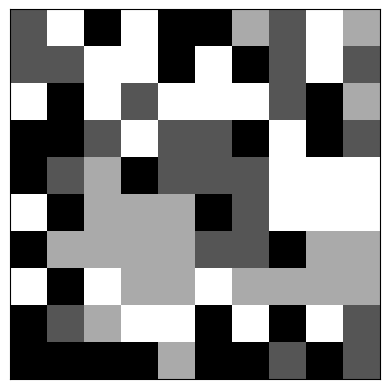

In [3]:
fig, ax = plt.subplots()

im = ax.imshow(MAT, cmap='grey')

ax.set_xticks([])
ax.set_yticks([])

In [4]:
def test(MAT, num):
    x = num
    for i in range(1,n-1):
        for j in range(1,n-1):
            if MAT[i,j] >= 4:
                # print(f"rozrzut granul wokol punktu ({i}, {j})")
                MAT[i][j] -= 4
                MAT[i-1][j] += 1
                MAT[i][j-1] += 1
                MAT[i+1][j] += 1
                MAT[i][j+1] += 1
                x += 4
    return x

upuszczono ziarenko w punkcie (3,7)
bazowa granula (3,7) rozrzuca
w tej iteracji przesunieto 16 granulek:
upuszczono ziarenko w punkcie (8,6)
bazowa granula (8,6) rozrzuca
w tej iteracji przesunieto 4 granulek:
upuszczono ziarenko w punkcie (5,4)
w tej iteracji przesunieto 0 granulek:
upuszczono ziarenko w punkcie (6,2)
w tej iteracji przesunieto 0 granulek:
upuszczono ziarenko w punkcie (5,4)
bazowa granula (5,4) rozrzuca
w tej iteracji przesunieto 0 granulek:
upuszczono ziarenko w punkcie (5,6)
w tej iteracji przesunieto 0 granulek:
upuszczono ziarenko w punkcie (1,3)
w tej iteracji przesunieto 0 granulek:
upuszczono ziarenko w punkcie (5,5)
w tej iteracji przesunieto 0 granulek:
upuszczono ziarenko w punkcie (4,5)
w tej iteracji przesunieto 0 granulek:
upuszczono ziarenko w punkcie (5,5)
bazowa granula (5,5) rozrzuca
w tej iteracji przesunieto 4 granulek:


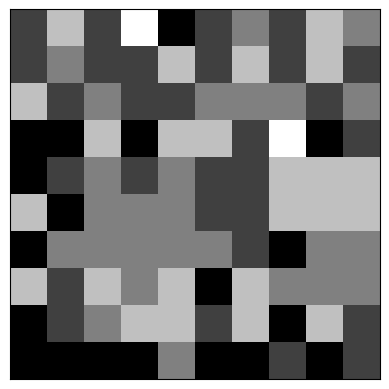

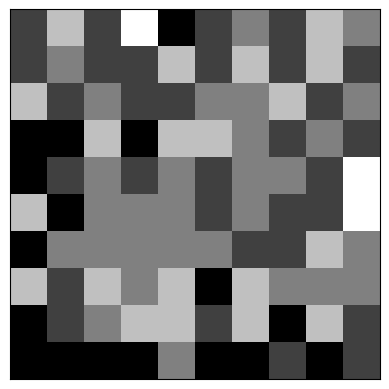

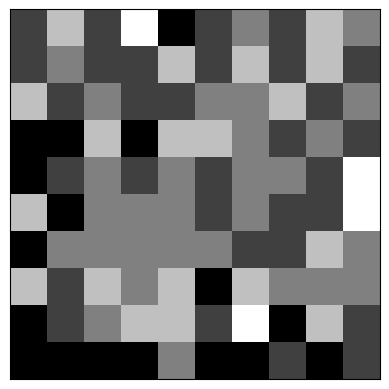

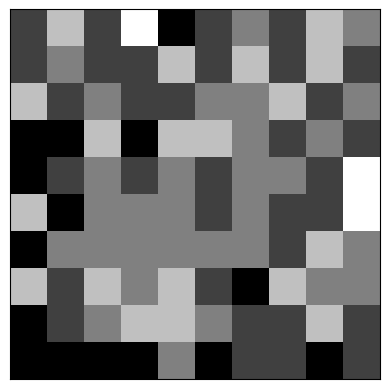

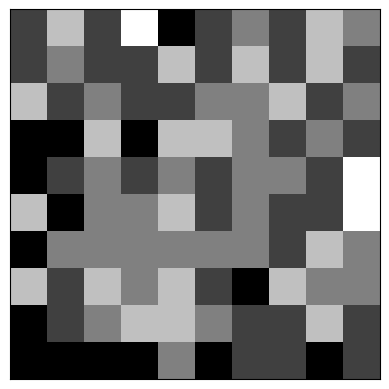

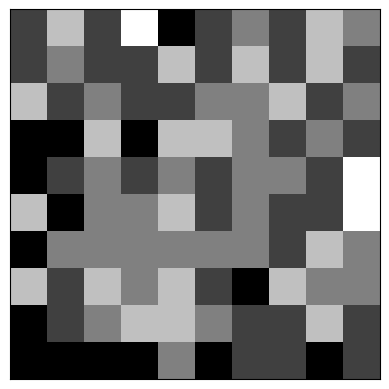

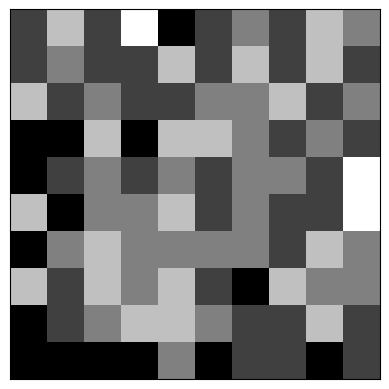

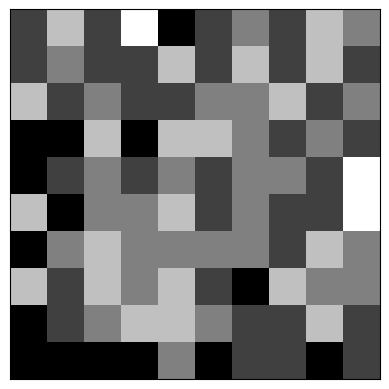

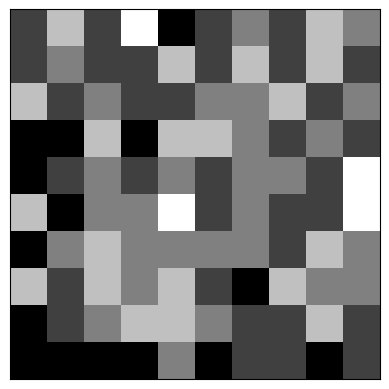

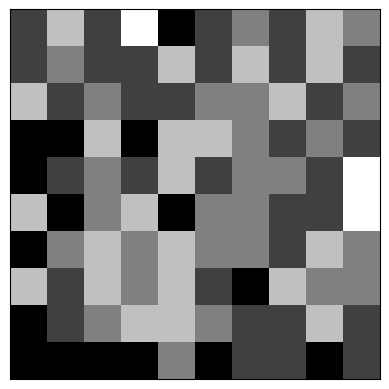

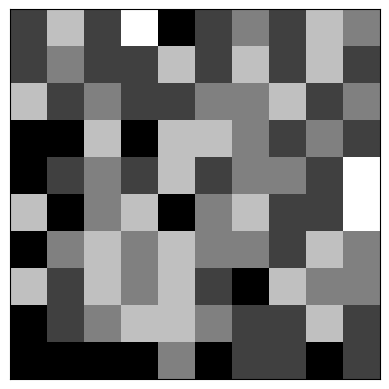

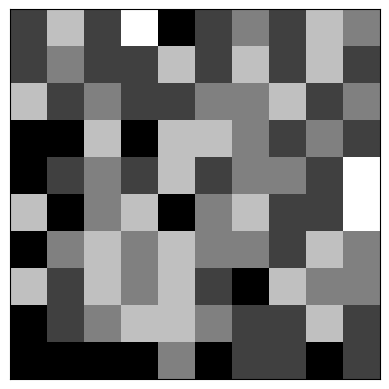

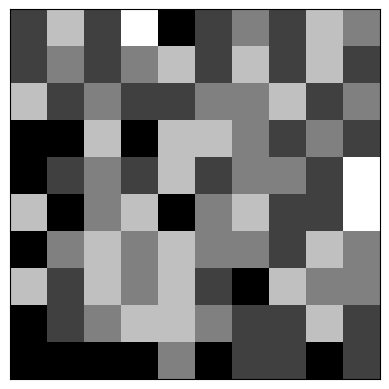

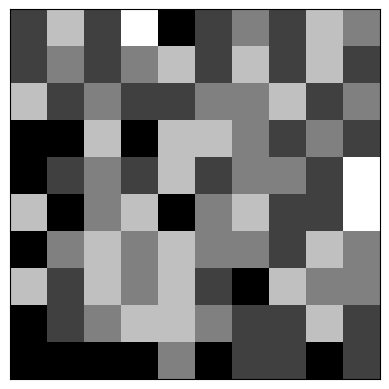

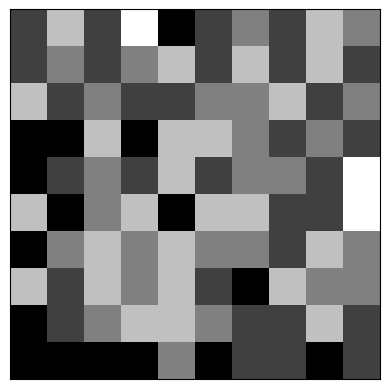

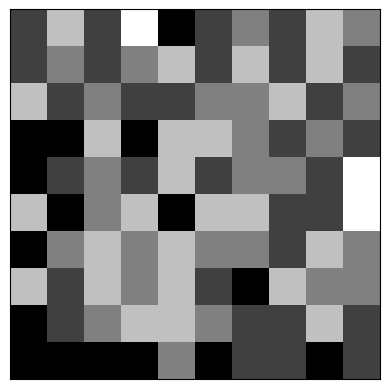

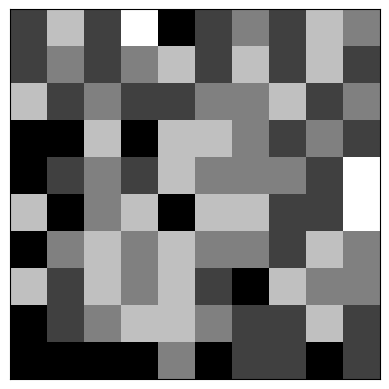

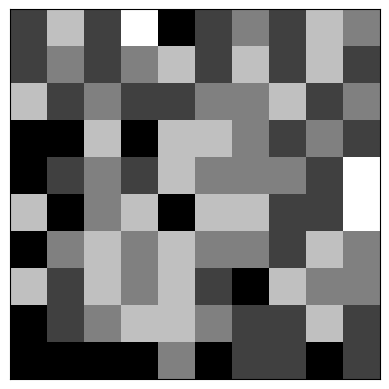

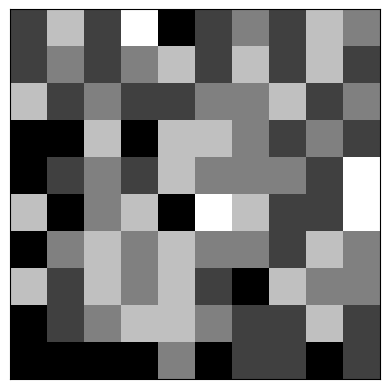

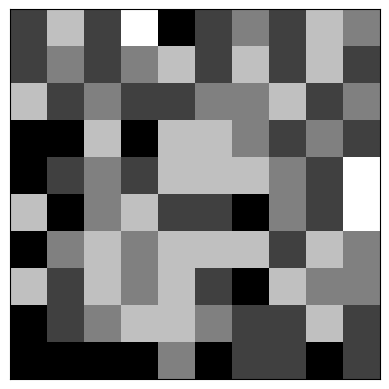

In [7]:
num = 1
for i in range(0,10):
    a = np.random.randint(1,n-1) # 0 or 1
    b = np.random.randint(1,n-1)
    MAT[a][b] += 1
    print(f"upuszczono ziarenko w punkcie ({a},{b})")
    fig, ax = plt.subplots()
    im = ax.imshow(MAT, cmap='grey')
    ax.set_xticks([])
    ax.set_yticks([])
    
    if MAT[a][b] >= 4:
        print(f"bazowa granula ({a},{b}) rozrzuca")
        MAT[a][b] -= 4
        MAT[a-1][b] += 1
        MAT[a][b-1] += 1
        MAT[a+1][b] += 1
        MAT[a][b+1] += 1
        num += 4
        
    num_2 = test(MAT, num)
    s = num_2 - num
    num = num_2
    print(f"w tej iteracji przesunieto {s} granulek:")
    fig, ax = plt.subplots()
    im = ax.imshow(MAT, cmap='grey')
    ax.set_xticks([])
    ax.set_yticks([])

## Zadanie 2

In [8]:
n  = 20
tab = np.zeros(10000)
MAT = np.zeros((n,n))
num = 0
for i in range(0, n):
    for j in range(0, n):
        MAT[i, j] = np.random.randint(0,4)

In [9]:
for i in range(0, 10000):
    a = np.random.randint(1,n-1) # 0 or 1
    b = np.random.randint(1,n-1)
    MAT[a][b] += 1
    num += 1
    num_2 = test(MAT, num)
    s = num_2 - num
    tab[i] = s
    if (i % 500 == 0):
        print(f"krok: {i}, rozmiar lawiny: {s}")

krok: 0, rozmiar lawiny: 0
krok: 500, rozmiar lawiny: 160
krok: 1000, rozmiar lawiny: 60
krok: 1500, rozmiar lawiny: 64
krok: 2000, rozmiar lawiny: 76
krok: 2500, rozmiar lawiny: 52
krok: 3000, rozmiar lawiny: 56
krok: 3500, rozmiar lawiny: 56
krok: 4000, rozmiar lawiny: 52
krok: 4500, rozmiar lawiny: 40
krok: 5000, rozmiar lawiny: 128
krok: 5500, rozmiar lawiny: 120
krok: 6000, rozmiar lawiny: 48
krok: 6500, rozmiar lawiny: 60
krok: 7000, rozmiar lawiny: 64
krok: 7500, rozmiar lawiny: 40
krok: 8000, rozmiar lawiny: 24
krok: 8500, rozmiar lawiny: 100
krok: 9000, rozmiar lawiny: 96
krok: 9500, rozmiar lawiny: 112


## Zadanie 3

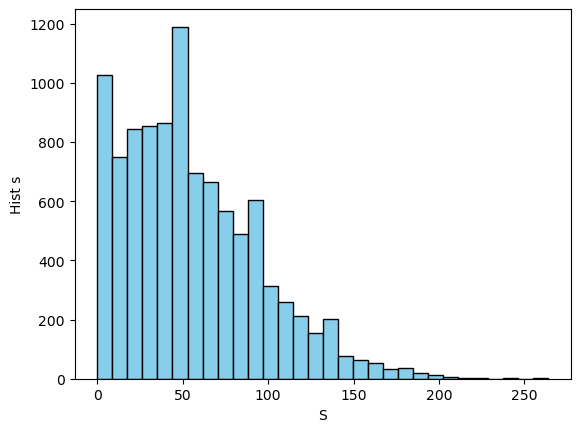

In [10]:
plt.hist(tab, bins=30, color='skyblue', edgecolor='black')

plt.xlabel('S')
plt.ylabel('Hist s')

plt.show()

/tmp/ipykernel_9292/3995319595.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tab, shade=True)


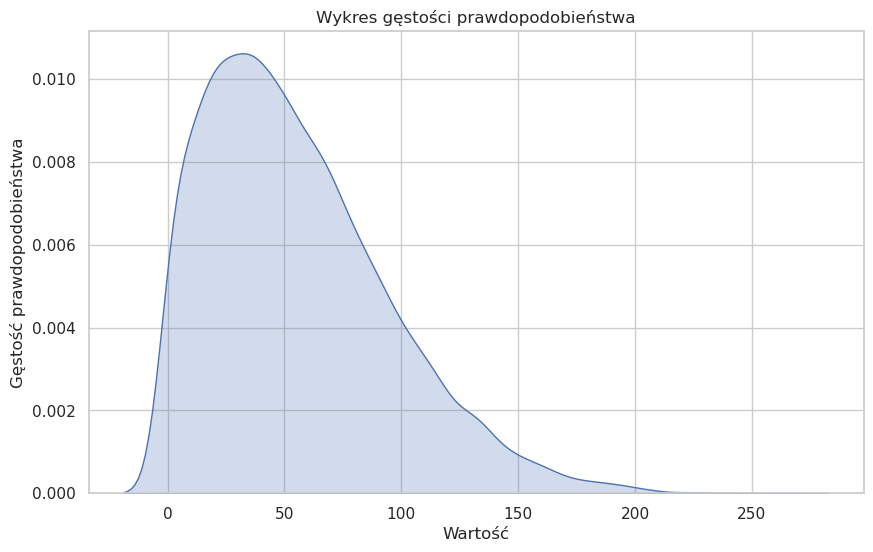

In [11]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(tab, shade=True)
plt.title('Wykres gęstości prawdopodobieństwa')
plt.xlabel('Wartość')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.show()
